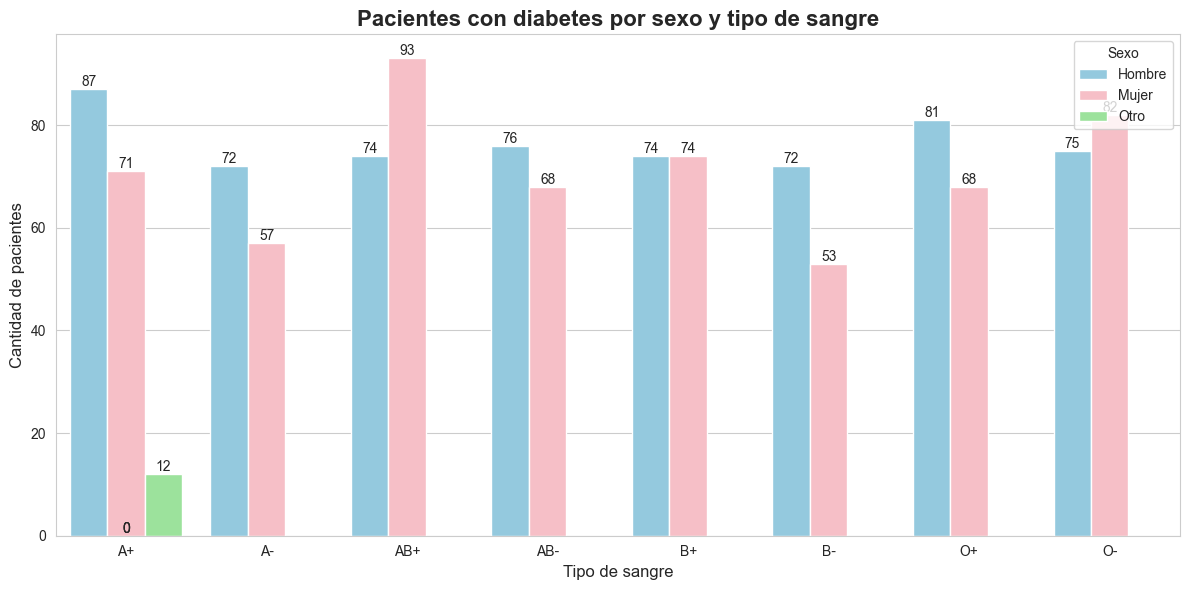

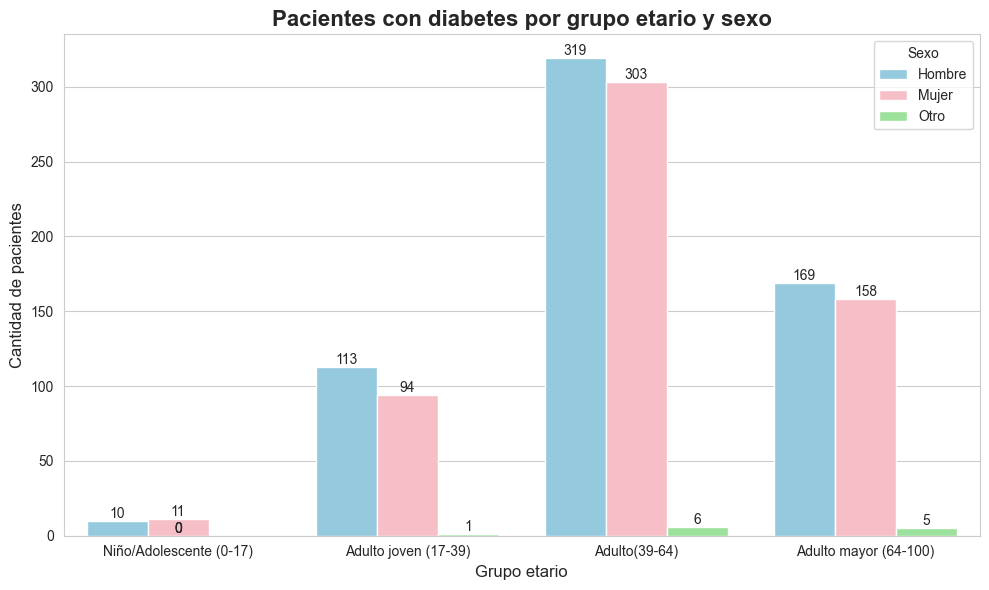

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
nombre_archivo_csv = '../data/dataset_final.csv'
df = pd.read_csv(nombre_archivo_csv)

# Filtrar solo pacientes con diabetes
df_diabetes = df[df['diabetes'] == 1].copy()


"""Diabetes por Sexo y Tipo de Sangre"""

# Configuración del gráfico
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

# Valores color
sex_palette = {
    'Male': 'skyblue',
    'Female': 'lightpink',
    'Other': 'lightgreen' 
}

# Orden explícito de los tipos de sangre
blood_order = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

ax = sns.countplot(
    data=df_diabetes,
    x='Blood Type',
    hue='sex',
    palette=sex_palette,
    order=blood_order
)

# Valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        str(int(height)),
        (p.get_x() + p.get_width()/2., height),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Etiquetas y titulo
plt.title("Pacientes con diabetes por sexo y tipo de sangre", fontsize=16, weight='bold')
plt.xlabel("Tipo de sangre", fontsize=12)
plt.ylabel("Cantidad de pacientes", fontsize=12)
plt.legend(title="Sexo", labels=["Hombre", "Mujer", "Otro"], loc='upper right')

plt.tight_layout()
plt.show()



"""cantidad de pacientes con diabetes por grupo etario y sexo"""

# Clasificar por grupo etario
bins_edad = [0, 17, 39, 64, 100]
labels_edad = ["Niño/Adolescente (0-17)", "Adulto joven (17-39)", "Adulto(39-64)", "Adulto mayor (64-100)"]
df_diabetes['Grupo_Etario'] = pd.cut(df_diabetes['age'], bins=bins_edad, labels=labels_edad, right=True)

# Configuracion del grafico
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Gráfico de barras agrupadas por grupo etario y sexo
ax = sns.countplot(
    data=df_diabetes,
    x='Grupo_Etario',
    hue='sex',
    palette={'Male':'skyblue', 'Female':'lightpink', 'Other':'lightgreen'}
)

# Añadir valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        str(int(height)), 
        (p.get_x() + p.get_width()/2., height), 
        ha='center', va='bottom', fontsize=10
    )

# Etiquetas y título
plt.title("Pacientes con diabetes por grupo etario y sexo", fontsize=16, weight='bold')
plt.xlabel("Grupo etario", fontsize=12)
plt.ylabel("Cantidad de pacientes", fontsize=12)
plt.legend(title="Sexo", labels=["Hombre", "Mujer", "Otro"], loc='upper right')

plt.tight_layout()
plt.show()
